## Arte Generativa

In [25]:
import numpy as np
import pandas as pd
from samila import Projection
from pycaret.regression import *
from scipy.stats import norm
import math
import random
from samila import GenerativeImage

### Plan de generación

Se creara un modelo a partir de unos datos generados aleatorios con una distribución normal. El modelo dará arte como parámetros a las ecuaciones matemáticos.

## Generación de datos con distribución normal

In [3]:
x = norm.rvs(size=150,loc=0,scale=1, random_state = 82022)
y = norm.rvs(size=150,loc=0,scale=1, random_state = 901820)

## Variable Respuesta - Función

In [4]:
z = np.sinh(x) + np.cosh(y) 

## Creación del Dataframe

In [6]:
df = pd.DataFrame(data = [x,y,z]).T

In [7]:
df.rename(columns = {0:'x',1:'y',2:'z'}, inplace = True)

In [8]:
df.head()

,x,y,z
0,0.684580,0.287127,1.780823
1,-0.243138,-0.286926,0.795906
2,0.996072,0.449541,2.271906
3,-0.097309,-0.551537,1.058529
4,0.324220,0.867019,1.729934


## Creación del Modelo

In [9]:
exp = setup(data = df, target = 'z', session_id = 1042)

,Description,Value
0,session_id,1042
1,Target,z
2,Original Data,"(150, 3)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(104, 2)"


In [10]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.5462,3.7152,1.2222,0.7194,0.2393,1.2476,0.0940
et,Extra Trees Regressor,0.4733,3.3245,1.1852,0.6315,0.2057,2.1611,0.3140
gbr,Gradient Boosting Regressor,0.4832,3.1453,1.1968,0.4871,0.1905,0.8557,0.0710
huber,Huber Regressor,0.7252,3.3903,1.3675,0.4713,0.2868,2.2994,0.0360
en,Elastic Net,0.8616,4.3120,1.5306,0.4498,0.3511,1.5341,0.0220
lasso,Lasso Regression,0.8674,4.4515,1.5420,0.4289,0.3494,2.0960,0.0240
rf,Random Forest Regressor,0.5582,3.7502,1.2975,0.4249,0.2173,1.2568,0.3560
dt,Decision Tree Regressor,0.5958,3.6434,1.3739,0.3618,0.2333,0.7970,0.0430
lightgbm,Light Gradient Boosting Machine,0.9905,4.7774,1.6610,0.3384,0.3924,3.1464,0.0440
ada,AdaBoost Regressor,0.8401,3.8799,1.5295,0.3361,0.3334,6.9194,0.0790


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

#### En este caso se elige cualquier modelo a probar pues no interesa su aproximación al modelo real, pues al contrario de la ciencias exactas se busca darle arte a las imágenes a través del error del modelo

In [11]:
ls = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.5470,0.4786,0.6918,0.6242,0.2121,0.3920
1,1.7633,18.8439,4.3410,0.2344,0.5031,0.3838
2,0.8041,2.2734,1.5078,-1.3828,0.2639,0.4765
3,0.5127,0.4120,0.6418,0.8607,0.2354,0.6974
4,0.5171,0.4734,0.6880,0.8005,0.2837,2.2184
5,0.9530,1.6580,1.2876,0.6914,0.4381,0.7764
6,0.4543,0.3890,0.6237,0.6946,0.2723,3.9283
7,0.3325,0.1798,0.4241,0.8234,0.1706,10.6420
8,0.5802,0.7140,0.8450,0.7406,0.3024,0.4698
9,2.2093,19.0926,4.3695,0.2024,0.8120,0.9754


## Modelo dos

Se realiza el mismo procedimiento anterior pero para otra función.

In [12]:
t = norm.rvs(size=150,loc=0,scale=1, random_state = 2230)
p = norm.rvs(size=150,loc=0,scale=1, random_state = 2923)

In [13]:
y =  np.tanh(p) + np.sinh(t) 

In [14]:
df2 = pd.DataFrame(data = [t,p,y]).T
df2.head()

,0,1,2
0,-1.119458,1.044644,-0.588653
1,0.442866,1.068147,1.246247
2,-1.015627,-2.069337,-2.168072
3,-0.781306,1.161750,-0.041648
4,0.116668,-0.382936,-0.248321


In [15]:
df2.rename(columns = {0:'x',1:'y',2:'z'}, inplace = True)

In [16]:
df2.head()

,x,y,z
0,-1.119458,1.044644,-0.588653
1,0.442866,1.068147,1.246247
2,-1.015627,-2.069337,-2.168072
3,-0.781306,1.161750,-0.041648
4,0.116668,-0.382936,-0.248321


In [17]:
exp2 = setup(data = df2, target = 'z',session_id = 4220)

,Description,Value
0,session_id,4220
1,Target,z
2,Original Data,"(150, 3)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(104, 2)"


In [18]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1050,0.0385,0.1663,0.9825,0.0602,0.4100,0.3370
rf,Random Forest Regressor,0.2357,0.1404,0.3445,0.9307,0.1363,0.9433,0.3570
gbr,Gradient Boosting Regressor,0.2173,0.1317,0.3207,0.9300,0.1339,0.9014,0.0530
huber,Huber Regressor,0.2598,0.2025,0.4107,0.8947,0.1397,1.0368,0.0220
knn,K Neighbors Regressor,0.2842,0.2797,0.4576,0.8797,0.1610,0.8565,0.0670
ada,AdaBoost Regressor,0.3579,0.2145,0.4423,0.8760,0.2021,2.0395,0.1580
ridge,Ridge Regression,0.2881,0.1865,0.4060,0.8532,0.1671,1.7565,0.0340
br,Bayesian Ridge,0.2921,0.1862,0.4079,0.8502,0.1687,1.7709,0.0210
lr,Linear Regression,0.2928,0.1863,0.4083,0.8497,0.1690,1.7732,0.0270
lar,Least Angle Regression,0.2928,0.1863,0.4083,0.8497,0.1690,1.7732,0.0290


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=4220, verbose=0, warm_start=False)

In [19]:
EN = create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0880,1.9642,1.4015,0.0585,0.5259,1.9936
1,0.7970,0.8897,0.9433,0.5070,0.4604,3.5590
2,0.5120,0.7187,0.8478,0.5615,0.3342,0.6123
3,1.0872,2.5684,1.6026,0.1649,0.5045,1.9580
4,0.8752,1.3589,1.1657,0.5989,0.4439,0.6076
5,0.8891,2.1758,1.4751,0.4251,0.4741,0.7503
6,0.8455,0.8961,0.9466,0.4975,0.4659,1.4267
7,0.7216,0.7739,0.8797,0.5848,0.4240,0.6297
8,0.1493,0.0474,0.2177,0.6799,0.1719,8.7912
9,0.8633,0.9668,0.9833,0.5440,0.4573,0.6903


## Predicción a partir de los modelos generados

Se crea una malla de puntos predichos para cada modelo. Se generan 1000 puntos a partir de una distribución normal.

In [20]:
pp = norm.rvs(size=1000,loc=0,scale=1)
kk = norm.rvs(size=1000,loc=0,scale=1)
pro = pd.DataFrame(data = [pp,kk]).T

In [21]:
gg = ls.predict(pro.values)

In [22]:
uu = norm.rvs(size=1000,loc=0,scale=1)
qq = norm.rvs(size=1000,loc=0,scale=1)
pro2 = pd.DataFrame(data = [pp,kk]).T

In [23]:
ff = EN.predict(pro2.values)

## Imágenes

Se generan 10 imágenes con ecuaciones complejas, perturbadas por los modelos creados.

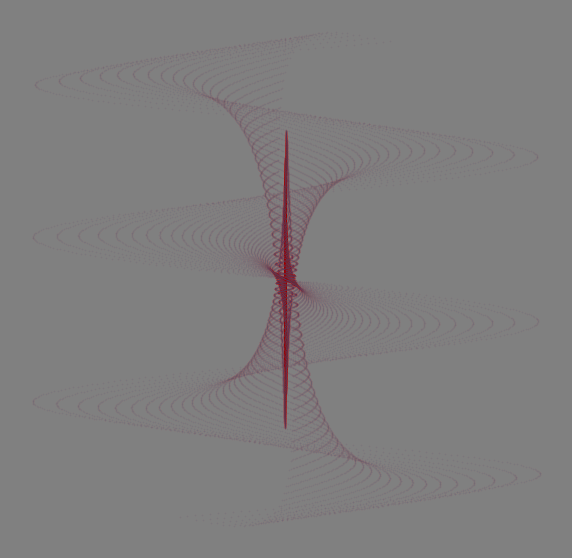

In [40]:
def f1(x,y):
    
    i = int(random.uniform(0,1000))

    result = gg[i]* ((y**2) + x * math.exp(x))*math.atan2(y, x) * math.cos(x**2)
    return result

def f2(x,y):
    
    j = int(random.uniform(0,1000))
    result = ff[j] * (y**3  + 2*x**6) * (math.cosh(x) *math.sin(y**2)+math.exp(x*8)*math.sin(y*x))
    return result

g = GenerativeImage(f1,f2)
g.generate()
g.plot(color="red",bgcolor="grey",spot_size=1.5)

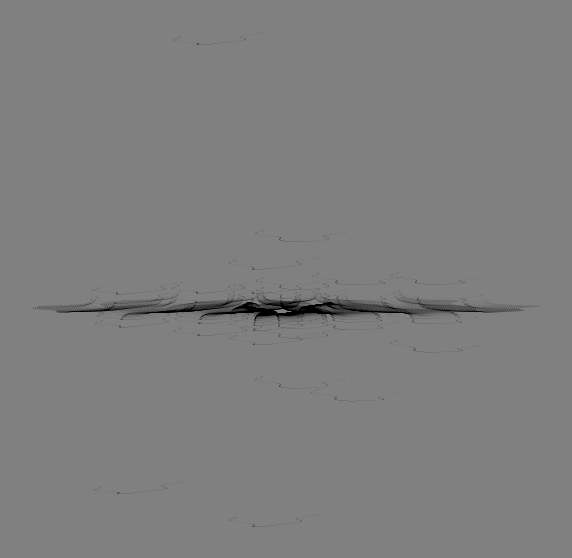

In [61]:
def f1(x,y):
    
    i = int(random.uniform(0,1000))

    result = gg[i]* (x**2  - math.tan(y**2) + abs(y-x))
    return result

def f2(x,y):
    
    j = int(random.uniform(0,1000))
    result = ff[j] * (y**3 - math.cos(x**2) + 2*x)
    return result

g = GenerativeImage(f1,f2)
g.generate()
g.plot(bgcolor="grey")

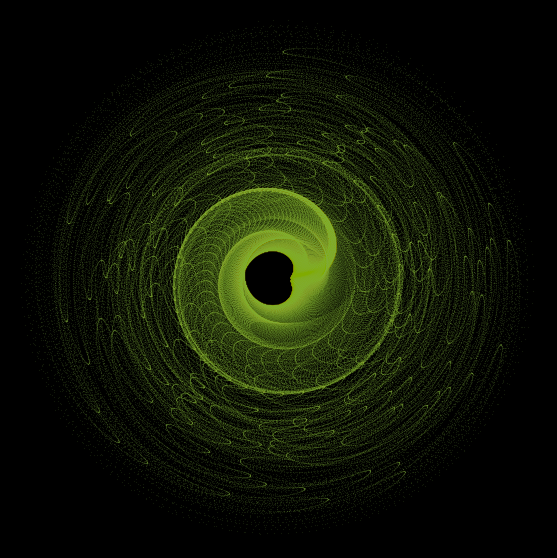

In [42]:
def f1(x,y):
    
    i = int(random.uniform(0,1000))

    result = gg[i]* (x**2  - math.tanh(y**2) + abs(y-x))
    return result

def f2(x,y):
    
    j = int(random.uniform(0,1000))
    result = ff[j] * (y**3 - math.cosh(x**2) + 2*x*y)
    return result

g = GenerativeImage(f1,f2)
g.generate()
g.plot(color="yellow",bgcolor="black",spot_size=0.9,projection=Projection.POLAR)

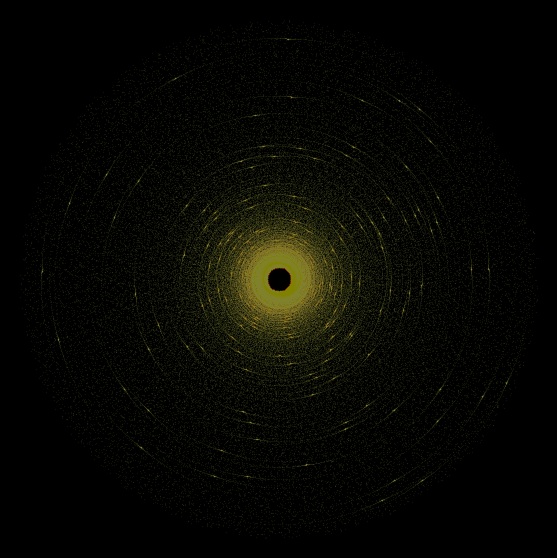

In [41]:
def f1(x,y):
    
    i = int(random.uniform(0,1000))

    result = gg[i]* (math.asinh(y**2) + x * math.exp(x))
    return result

def f2(x,y):
    
    j = int(random.uniform(0,1000))
    result = ff[j] * (y**3 - math.cosh(x**2) + 2*x**6)
    return result

g = GenerativeImage(f1,f2)
g.generate()
g.plot(color="orange",bgcolor="black",spot_size=0.9,projection=Projection.POLAR)

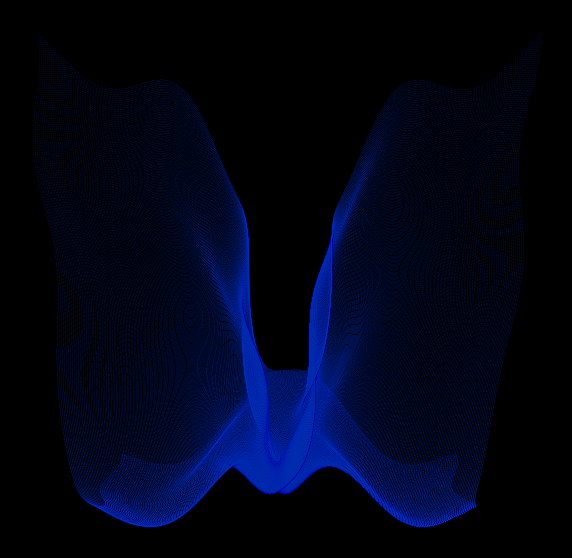

In [48]:
def f1(x,y):
    
    i = int(random.uniform(0,1000))

    result = gg[i]* ( x**2  - math.sin(y**2) + x *y)
    return result

def f2(x,y):
    
    j = int(random.uniform(0,1000))
    result = ff[j] * (y**3 - math.cos(x**2) + 2*x)
    return result

g = GenerativeImage(f1,f2)
g.generate()
g.plot(color="blue",bgcolor="black",spot_size=1.5)

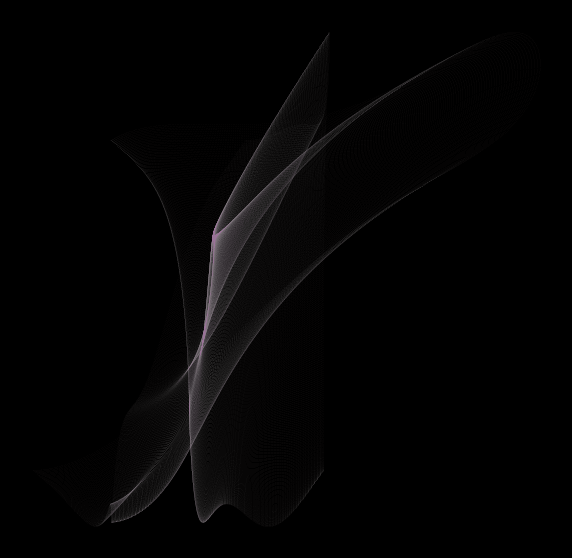

In [50]:
def f1(x,y):
    
    i = int(random.uniform(0,1000))

    result = gg[i]* ( x**2   + x *y+ math.sin(x*y)) + math.cos(y) 
    return result

def f2(x,y):
    
    j = int(random.uniform(0,1000))
    result = ff[j] * (math.exp(-x)+ math.exp(y-1)) * math.cos(y) + x**2 
    return result

g = GenerativeImage(f1,f2)
g.generate()
g.plot(color="pink",bgcolor="black",spot_size=0.04)

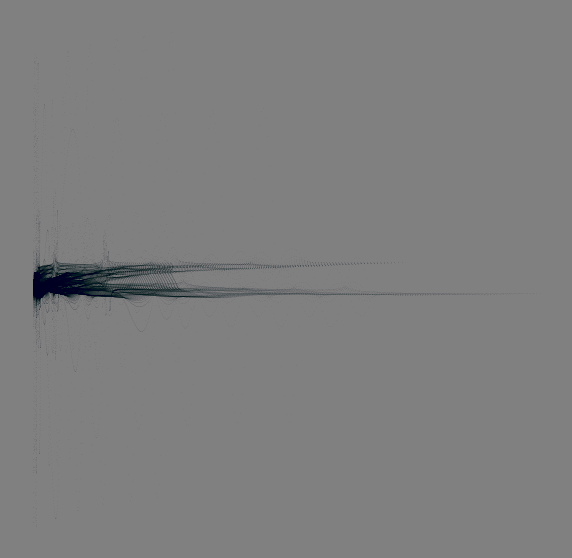

In [60]:
def f1(x,y):
    
    i = int(random.uniform(0,1000))

    result = gg[i]* ( x**2  + x *y+ math.cos(x*y)) + math.cos(y) + math.sin(x**3) * math.tan(y**2)* math.tanh(y*2)
    return result

def f2(x,y):
    
    j = int(random.uniform(0,1000))
    result = ff[j] * (math.exp(-x)+ math.exp(y-1)) * math.cosh(y) + math.sin(x*x)
    return result

g = GenerativeImage(f1,f2)
g.generate()
g.plot(bgcolor="grey",spot_size=0.09)

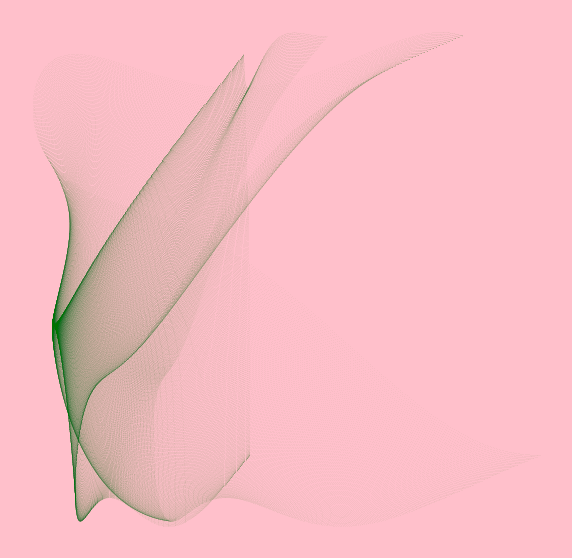

In [53]:
def f1(x,y):
    
    i = int(random.uniform(0,1000))

    result = gg[i]* ( x**2   + x *y+ math.sin(x*y)) + math.cos(y) 
    return result

def f2(x,y):
    
    j = int(random.uniform(0,1000))
    result = ff[j] * (math.exp(-x)+ math.exp(y-1)) * math.cos(y) + x**2 
    return result

g = GenerativeImage(f1,f2)
g.generate()
g.plot(color="green",bgcolor="pink",spot_size=0.07)


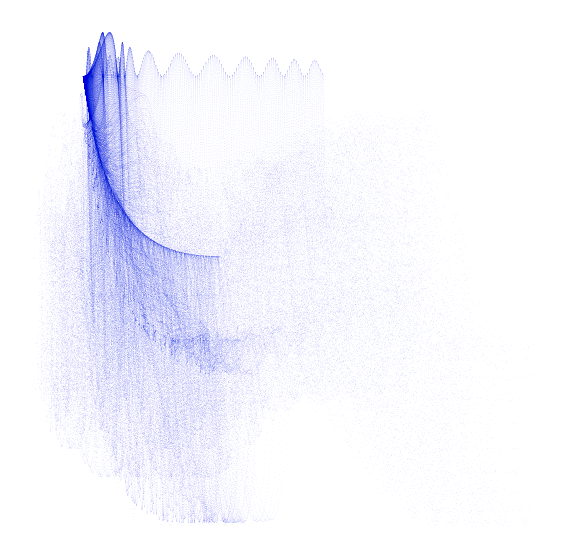

In [54]:
def f1(x,y):
    
    i = int(random.uniform(0,1000))

    result = (  math.cos(x*y)) + math.cos(y) + math.sin(x**3)*math.tanh(y*2)
    return result

def f2(x,y):
    
    j = int(random.uniform(0,1000))
    result =  (math.exp(-x)+ math.cosh(y) + math.sin(x*x) +x* math.cos(y**15))
    return result

g = GenerativeImage(f1,f2)
g.generate()
g.plot(color = "blue",spot_size=0.08)

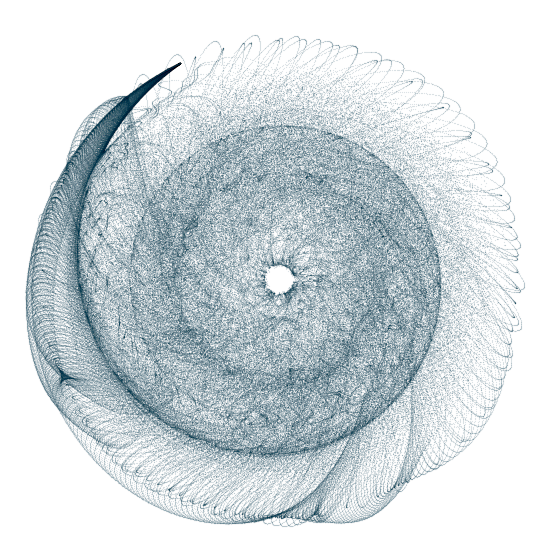

In [57]:
def f1(x,y):
    
    i = int(random.uniform(0,1000))

    result = (  math.cos(x*y)) + math.cos(y) + math.sin(x**3)*math.tanh(y*2)
    return result

def f2(x,y):
    
    j = int(random.uniform(0,1000))
    result =  (math.exp(-x)+ math.cosh(y) + math.sin(x*x) +x* math.cos(y**15))
    return result

g = GenerativeImage(f1,f2)
g.generate()
g.plot(projection=Projection.POLAR,spot_size=1.0)